In [11]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import re
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, GRU, Dropout

from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'keras'

In [2]:
import pandas as pd
import zipfile

zip_path = r"C:\\Users\\FOCUS COMPUTER\\Downloads\\combined_with_temp_v2.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("combined_with_temp_v2.csv") as f:
        df = pd.read_csv(f, low_memory=False)

df.head()


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,ET,Temperature change,2.0,Afghanistan,7271.0,Temperature change,7001.0,January,1961.0,1961.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ET,Temperature change,2.0,Afghanistan,7271.0,Temperature change,7001.0,January,1962.0,1962.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ET,Temperature change,2.0,Afghanistan,7271.0,Temperature change,7001.0,January,1963.0,1963.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ET,Temperature change,2.0,Afghanistan,7271.0,Temperature change,7001.0,January,1964.0,1964.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ET,Temperature change,2.0,Afghanistan,7271.0,Temperature change,7001.0,January,1965.0,1965.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,Area Code (FAO),Element Code,Months Code,Year Code,Year,Value,Country Code,M49 Code,Start Year,End Year,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,229925.000000,481474.000000,481474.000000,471818.000000,471818.000000,453645.000000,321.000000,304.000000,39.000000,9.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,130.647689,7259.037144,7009.882353,1992.087159,1992.087159,0.517948,1023.694704,405.187500,1996.589744,1997.888889,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,76.809008,118.863814,6.037949,17.783426,17.783426,1.047454,2036.506984,268.507231,7.799183,8.637772,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,6078.000000,7001.000000,1961.000000,1961.000000,-9.303000,1.000000,1.000000,1991.000000,1990.000000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,64.000000,7271.000000,7005.000000,1977.000000,1977.000000,-0.059000,83.000000,165.000000,1992.000000,1991.000000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,131.000000,7271.000000,7009.000000,1993.000000,1993.000000,0.441000,164.000000,399.000000,1992.000000,1992.000000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,194.000000,7271.000000,7016.000000,2007.000000,2007.000000,1.031000,247.000000,642.250000,2000.000000,2005.000000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,351.000000,7271.000000,7020.000000,2023.000000,2023.000000,11.759000,9011.000000,894.000000,2012.000000,2011.000000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


In [36]:
print(df.columns)

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description', 'source_file', 'Country Code',
       'Country', 'M49 Code', 'ISO2 Code', 'ISO3 Code', 'Start Year',
       'End Year', 'Area Code (M49)', 'Area Code', 'Y1961', 'Y1962', 'Y1963',
       'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971',
       'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979',
       'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
       'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995',
       'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003',
       'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')


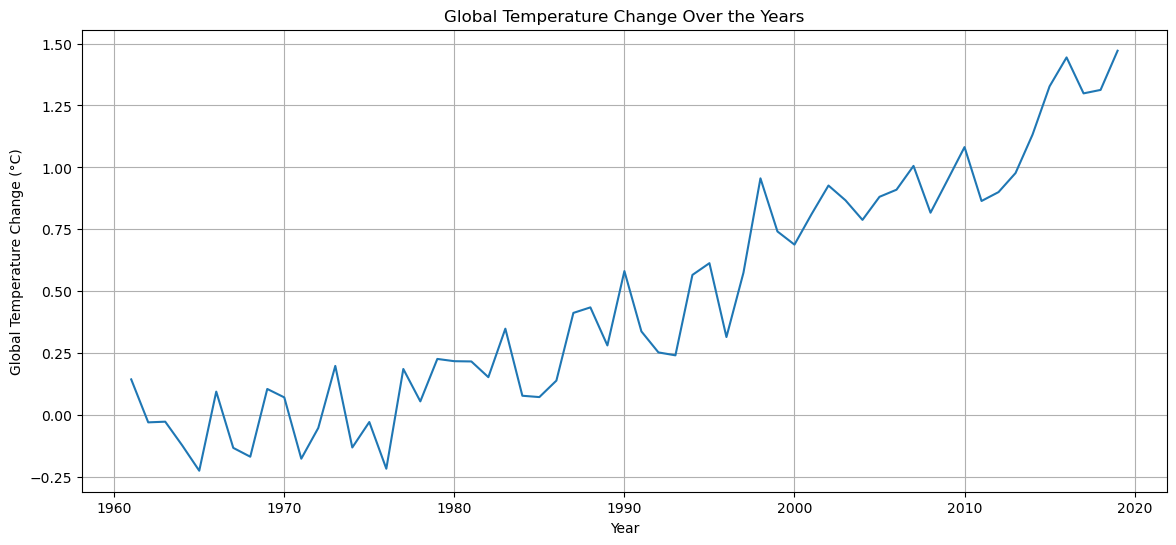

In [38]:

temp = df[df["Element"].str.contains("Temperature", case=False, na=False)]
year_cols = [c for c in df.columns if re.fullmatch(r"Y\d{4}", c)]
temp_long = temp.melt(
    id_vars=["Area"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Temp_Change"
)
temp_long["Year"] = temp_long["Year"].str.replace("Y", "", regex=False).astype(int)
temp_long["Temp_Change"] = pd.to_numeric(temp_long["Temp_Change"], errors="coerce")
global_temp = temp_long.groupby("Year")["Temp_Change"].mean().reset_index()
plt.figure(figsize=(14,6))
plt.plot(global_temp["Year"], global_temp["Temp_Change"])
plt.xlabel("Year")
plt.ylabel("Global Temperature Change (°C)")
plt.title("Global Temperature Change Over the Years")
plt.grid(True)
plt.show()



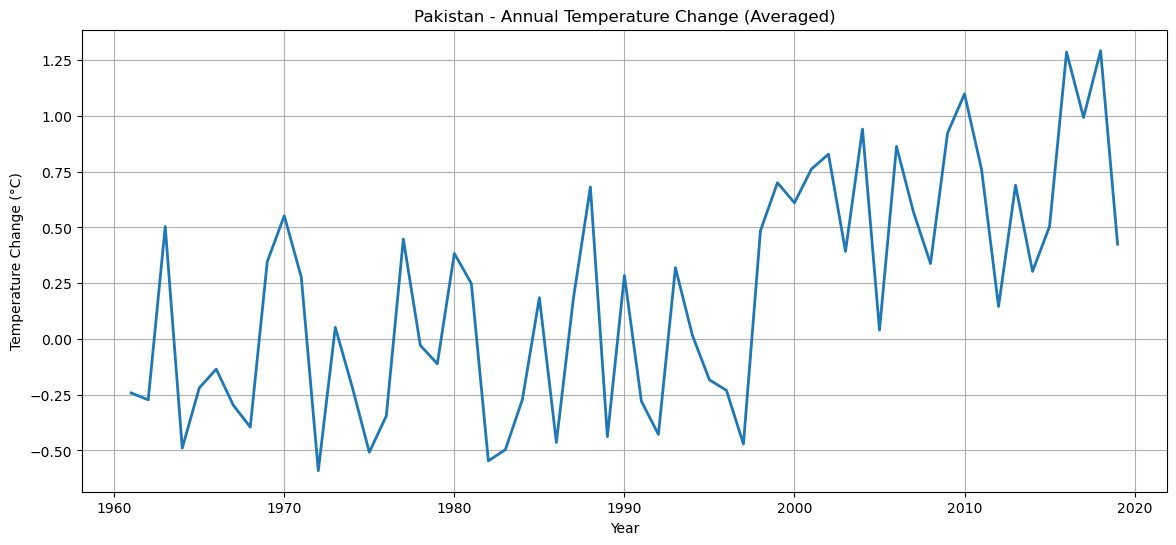

In [42]:
temp = df[df["Element"] == "Temperature change"]
pk = temp[temp["Area"] == "Pakistan"]
year_cols = [c for c in df.columns if re.fullmatch(r"Y\d{4}", c)]
pk_long = pk.melt(
    id_vars=["Area"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Temp_Change"
)
pk_long["Year"] = pk_long["Year"].str.replace("Y", "", regex=False).astype(int)
pk_long["Temp_Change"] = pd.to_numeric(pk_long["Temp_Change"], errors="coerce")
pk_yearly = (
    pk_long.groupby("Year")["Temp_Change"]
    .mean()
    .reset_index()
)
plt.figure(figsize=(14,6))
plt.plot(pk_yearly["Year"], pk_yearly["Temp_Change"], linewidth=2)
plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.title("Pakistan - Annual Temperature Change (Averaged)")
plt.grid(True)
plt.show()


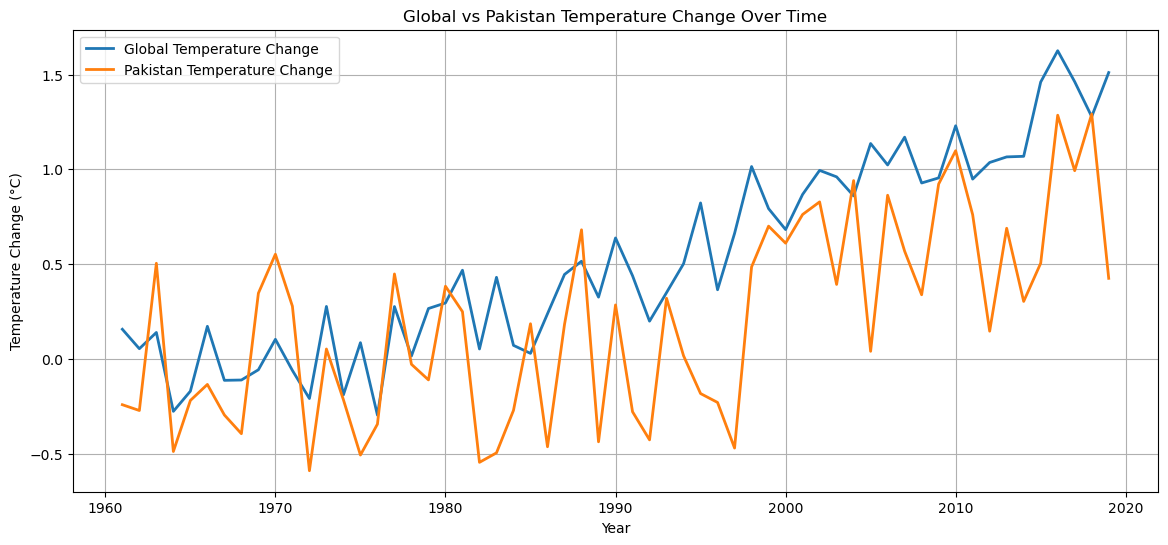

In [43]:
temp = df[df["Element"] == "Temperature change"]
pk = temp[temp["Area"] == "Pakistan"]
global_temp = temp[temp["Area"] == "World"]
year_cols = [c for c in df.columns if re.fullmatch(r"Y\d{4}", c)]

def melt_data(data):
    long = data.melt(
        id_vars=["Area"],
        value_vars=year_cols,
        var_name="Year",
        value_name="Temp_Change"
    )
    long["Year"] = long["Year"].str.replace("Y", "", regex=False).astype(int)
    long["Temp_Change"] = pd.to_numeric(long["Temp_Change"], errors="coerce")
    return long

pk_long = melt_data(pk)
global_long = melt_data(global_temp
pk_yearly = pk_long.groupby("Year")["Temp_Change"].mean().reset_index()
global_yearly = global_long.groupby("Year")["Temp_Change"].mean().reset_index()

plt.figure(figsize=(14,6))

plt.plot(global_yearly["Year"], global_yearly["Temp_Change"],
         label="Global Temperature Change", linewidth=2)

plt.plot(pk_yearly["Year"], pk_yearly["Temp_Change"],
         label="Pakistan Temperature Change", linewidth=2)

plt.xlabel("Year")
plt.ylabel("Temperature Change (°C)")
plt.title("Global vs Pakistan Temperature Change Over Time")
plt.grid(True)
plt.legend()
plt.show()


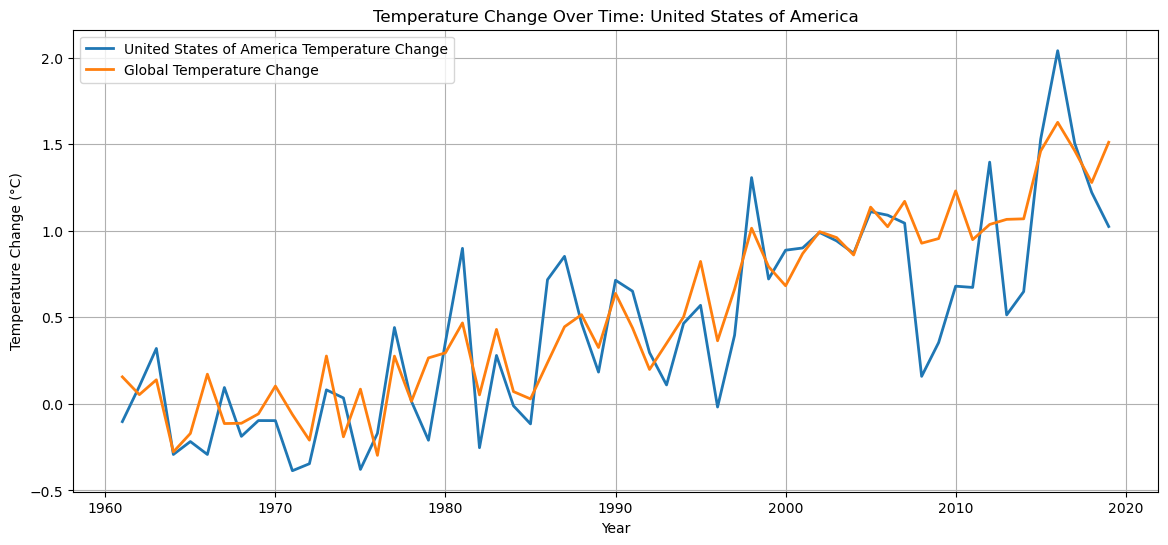

In [4]:
def plot(df, country_name, compare_global=True):
    temp = df[df["Element"] == "Temperature change"]
    country = temp[temp["Area"] == country_name]

    if country.empty:
        print(f"No temperature data found for: {country_name}")
        return
    if compare_global:
        global_data = temp[temp["Area"] == "World"]
    year_cols = [c for c in df.columns if re.fullmatch(r"Y\d{4}", c)]
    def melt_data(data):
        long = data.melt(
            id_vars=["Area"],
            value_vars=year_cols,
            var_name="Year",
            value_name="Temp_Change"
        )
        long["Year"] = long["Year"].str.replace("Y", "", regex=False).astype(int)
        long["Temp_Change"] = pd.to_numeric(long["Temp_Change"], errors="coerce")
        return long
    country_long = melt_data(country)
    if compare_global:
        global_long = melt_data(global_data)
    country_yearly = country_long.groupby("Year")["Temp_Change"].mean().reset_index()
    if compare_global:
        global_yearly = global_long.groupby("Year")["Temp_Change"].mean().reset_index()
    plt.figure(figsize=(14, 6))
    plt.plot(
        country_yearly["Year"],
        country_yearly["Temp_Change"],
        label=f"{country_name} Temperature Change",
        linewidth=2
    )
    if compare_global:
        plt.plot(
            global_yearly["Year"],
            global_yearly["Temp_Change"],
            label="Global Temperature Change",
            linewidth=2
        )
    plt.xlabel("Year")
    plt.ylabel("Temperature Change (°C)")
    plt.title(f"Temperature Change Over Time: {country_name}")
    plt.grid(True)
    plt.legend()
    plt.show()
plot(df,'United States of America',True)


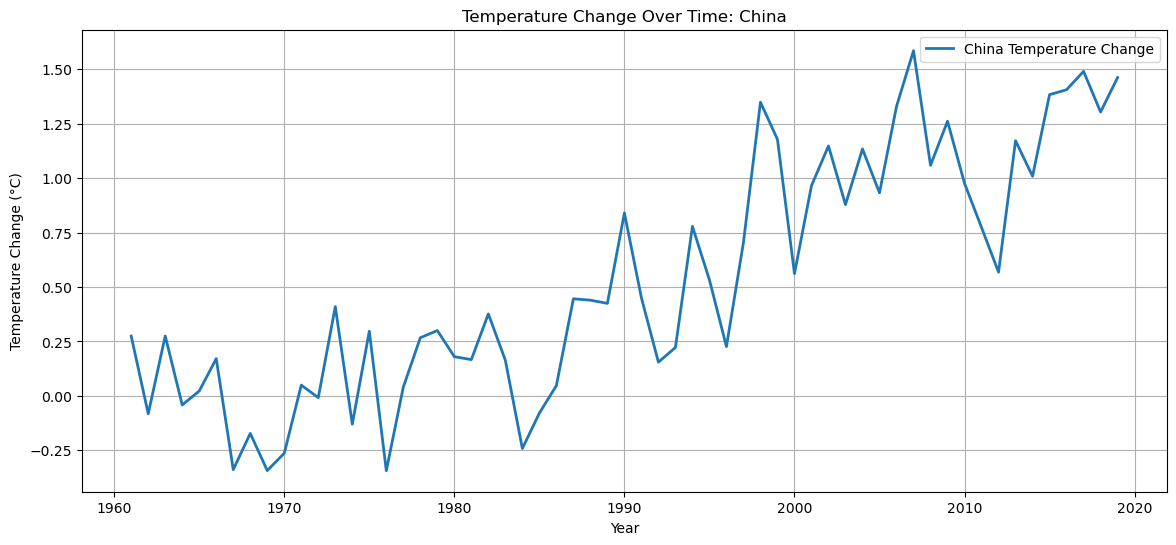

In [6]:
plot(df,'China',False)

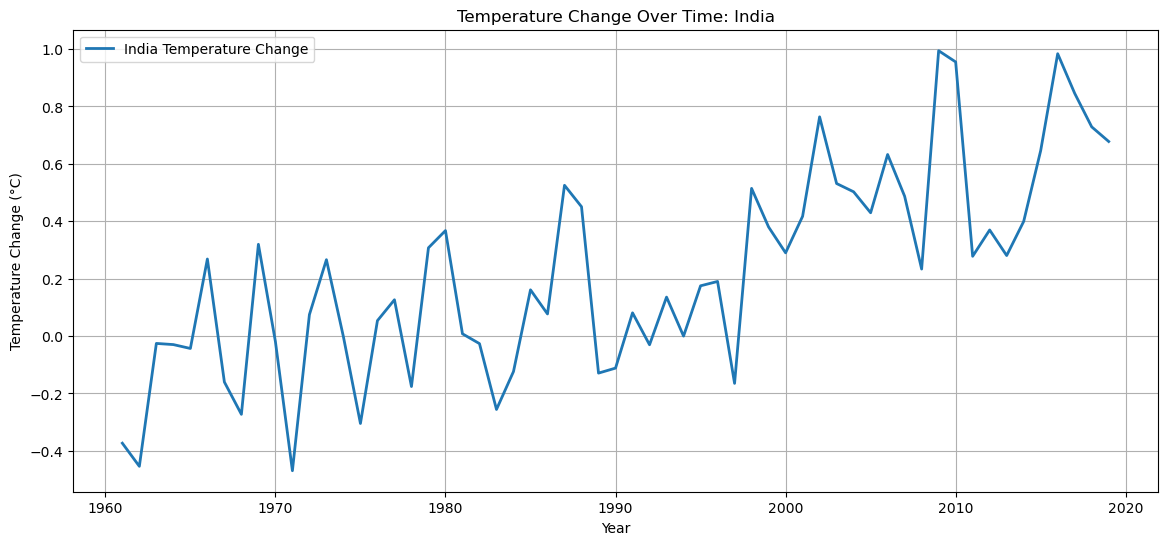

In [7]:
plot(df,'India',False)

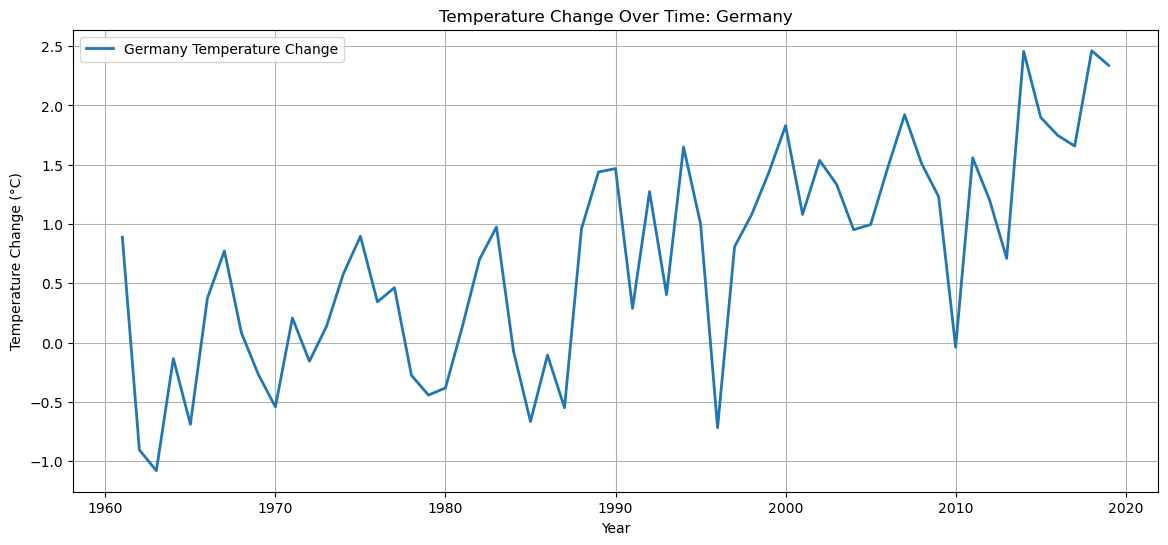

In [8]:
plot(df,'Germany',False)

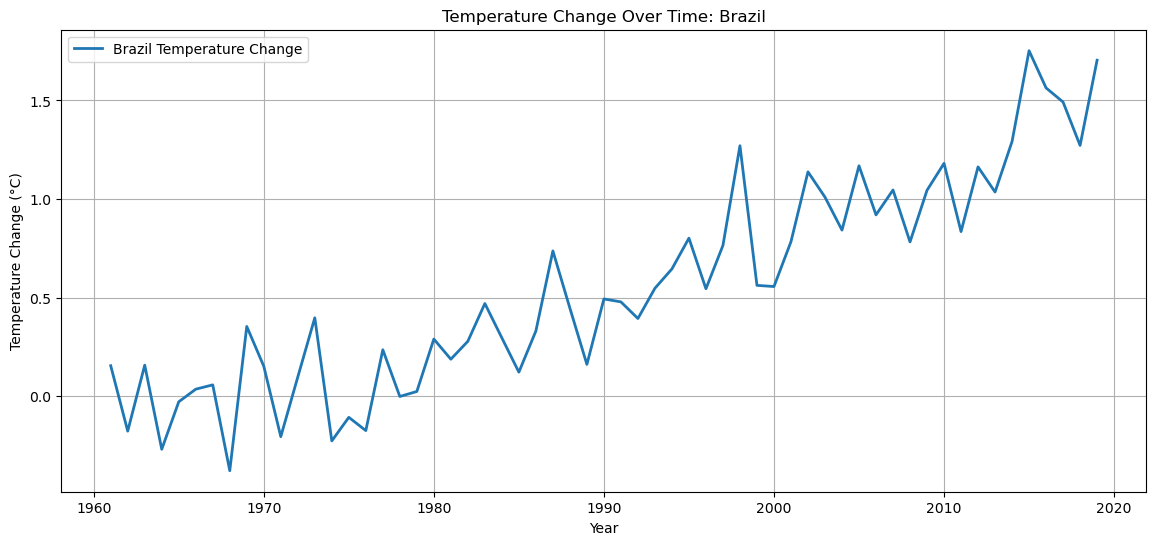

In [9]:
plot(df,'Brazil',False)

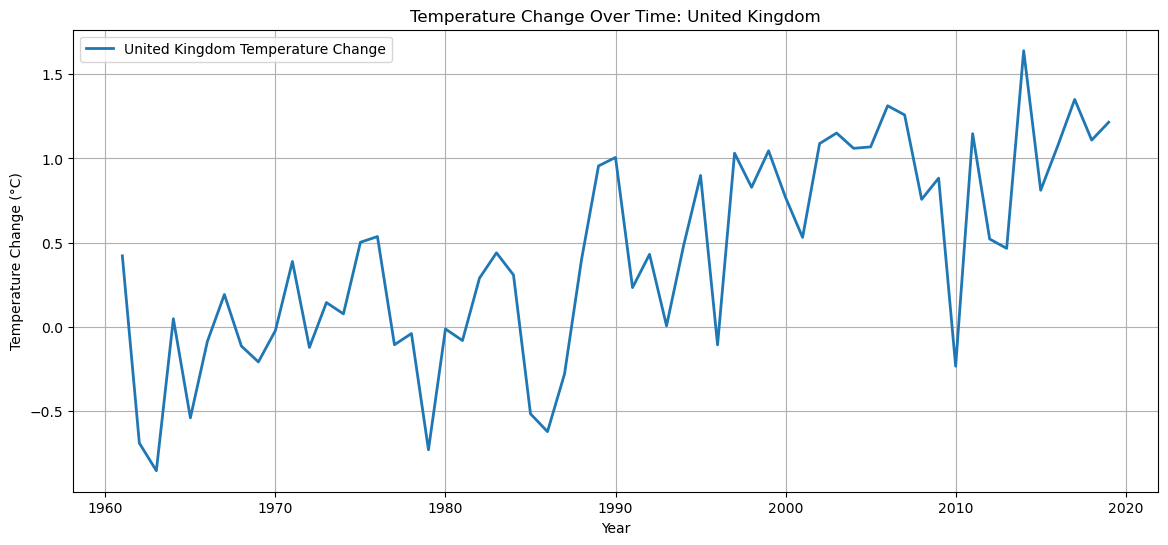

In [10]:
plot(df,"United Kingdom",False)

In [12]:
def basic_eda(df):
    print("-------------------------------TOP 5 RECORDS-----------------------------")
    print(df.head(5))
    print("-------------------------------INFO--------------------------------------")
    print(df.info())
    print("-------------------------------Describe----------------------------------")
    print(df.describe())
    print("-------------------------------Columns-----------------------------------")
    print(df.columns)
    print("-------------------------------Data Types--------------------------------")
    print(df.dtypes)
    print("----------------------------Missing Values-------------------------------")
    print(df.isnull().sum())
    print("----------------------------NULL values----------------------------------")
    print(df.isna().sum())
    print("--------------------------Shape Of Data---------------------------------")
    print(df.shape)
    print("============================================================================ \n")

In [59]:
tp_file = 'C:\\Users\\FOCUS COMPUTER\\Downloads\\Global_annual_mean_temp.csv'
tp_data = pd.read_csv(tp_file, parse_dates = ['Year'], index_col = 'Year')
tp_df = tp_data.copy()

In [60]:
basic_eda(tp_df)

-------------------------------TOP 5 RECORDS-----------------------------
            No_Smoothing  Lowess(5)
Year                               
1880-01-01         -0.17      -0.10
1881-01-01         -0.09      -0.13
1882-01-01         -0.11      -0.17
1883-01-01         -0.18      -0.20
1884-01-01         -0.28      -0.24
-------------------------------INFO--------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1880-01-01 to 2023-01-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No_Smoothing  144 non-null    float64
 1   Lowess(5)     144 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB
None
-------------------------------Describe----------------------------------
       No_Smoothing   Lowess(5)
count    144.000000  144.000000
mean       0.067500    0.066528
std        0.378167    0.364276
min       -0.480000   -0.410000
25%       -0.200000   -0.2

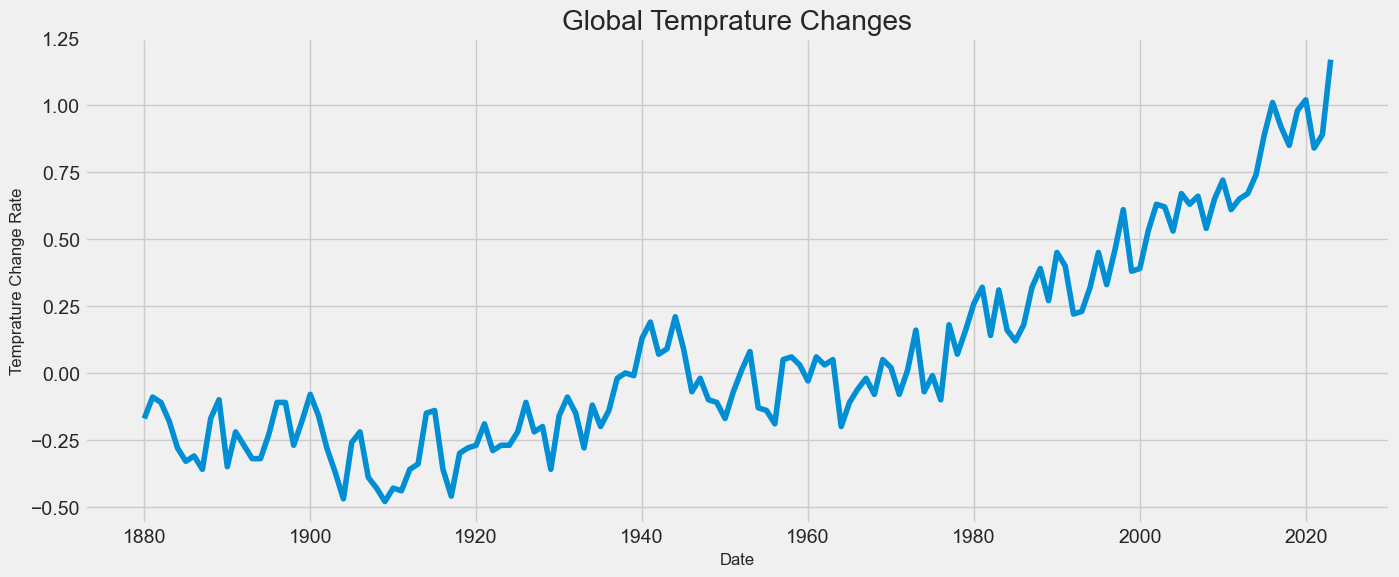

In [61]:
plt.figure(figsize = (15, 6))
plt.plot(tp_df.index, tp_df['No_Smoothing'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('Temprature Change Rate', {'fontsize': 12})
plt.title('Global Temprature Changes')
plt.show()

In [63]:
ic_file = 'C:\\Users\\FOCUS COMPUTER\\Downloads\\arctic_ice_extent.csv'
ic_data = pd.read_csv(ic_file, parse_dates = ['year'], index_col = 'year')
ic_df = ic_data.copy()

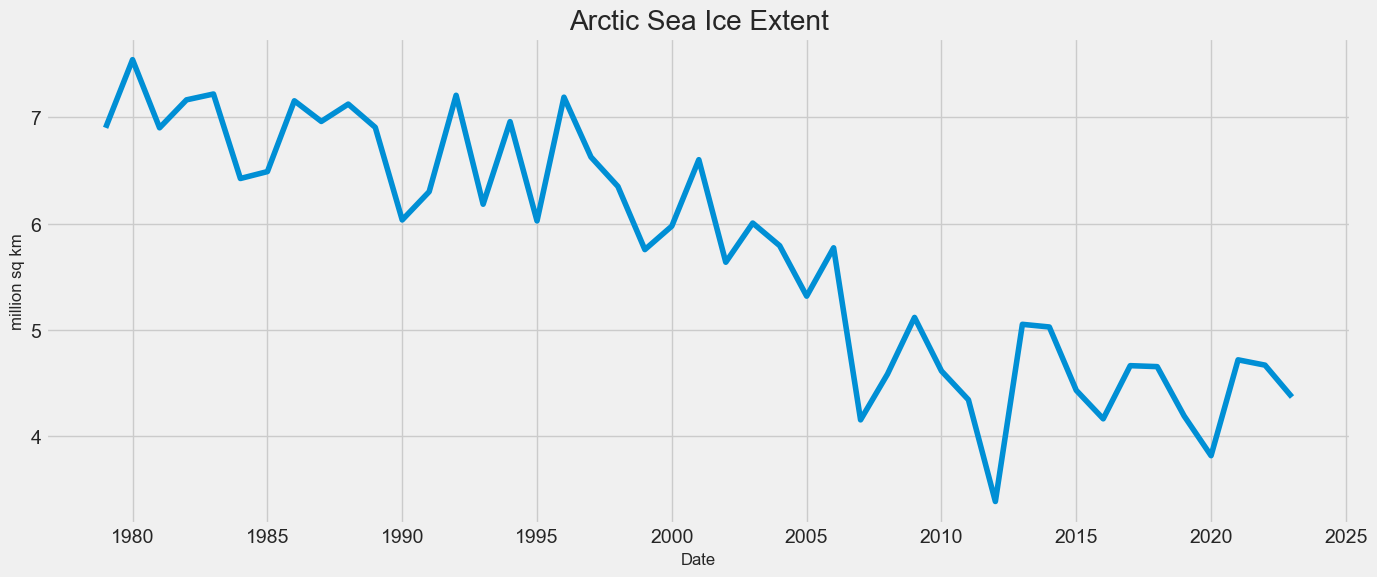

In [64]:
plt.figure(figsize = (15, 6))
plt.plot(ic_df.index, ic_df['extent'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('million sq km', {'fontsize': 12})
plt.title('Arctic Sea Ice Extent')
plt.show()

In [65]:
ams_file = 'C:\\Users\\FOCUS COMPUTER\\Downloads\\Antartica_mass.csv'
antarctica = pd.read_csv(ams_file)

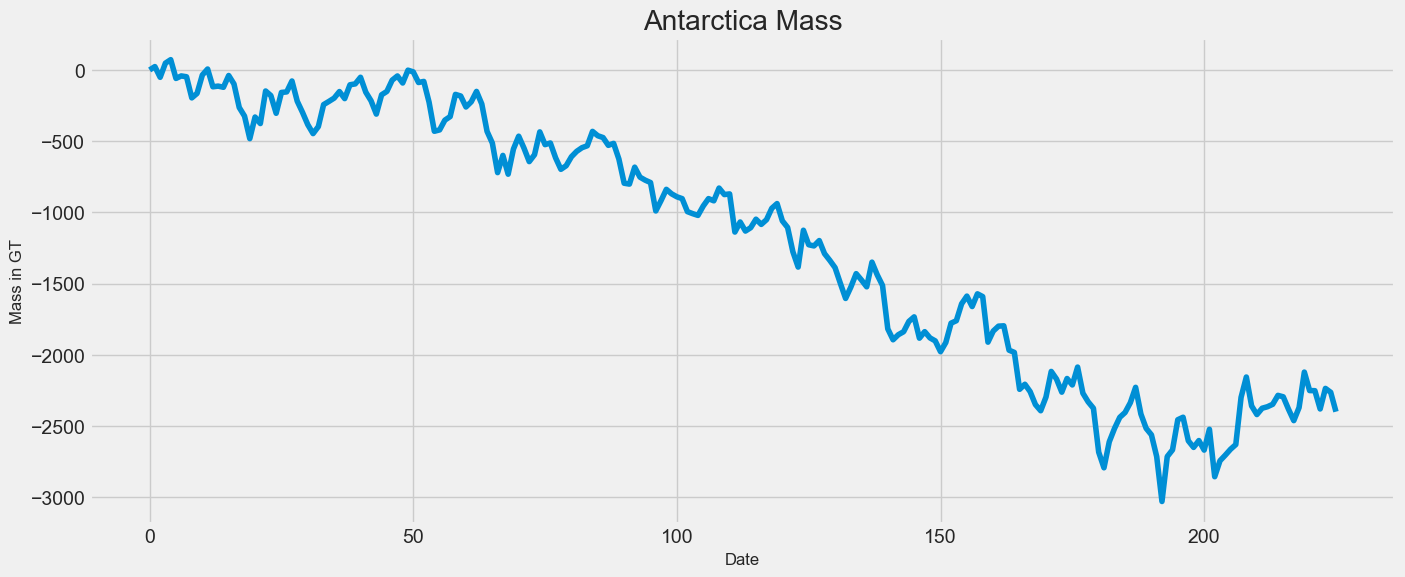

In [66]:
plt.figure(figsize = (15, 6))
plt.plot(antarctica.index, antarctica['Antarctic mass'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('Mass in GT', {'fontsize': 12})
plt.title('Antarctica Mass')
plt.show()

In [76]:
pop = pd.read_csv('C:\\Users\\FOCUS COMPUTER\\Downloads\\Global_annual_population.csv')
pop

,Year,Population,Unnamed: 2
0,1960,3.03,NaN
1,1961,3.07,NaN
2,1962,3.12,NaN
3,1963,3.19,NaN
4,1964,3.26,NaN
...,...,...,...
58,2018,7.60,NaN
59,2019,7.68,NaN
60,2020,7.76,NaN
61,2021,7.84,NaN


In [68]:
basic_eda(pop)

-------------------------------TOP 5 RECORDS-----------------------------
   Year   Population  Unnamed: 2
0  1960         3.03         NaN
1  1961         3.07         NaN
2  1962         3.12         NaN
3  1963         3.19         NaN
4  1964         3.26         NaN
-------------------------------INFO--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         63 non-null     int64  
 1    Population  63 non-null     float64
 2   Unnamed: 2   0 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB
None
-------------------------------Describe----------------------------------
              Year   Population  Unnamed: 2
count    63.000000    63.000000         0.0
mean   1991.000000     5.383175         NaN
std      18.330303     1.482324         NaN
min    1960.000000     3.030000      

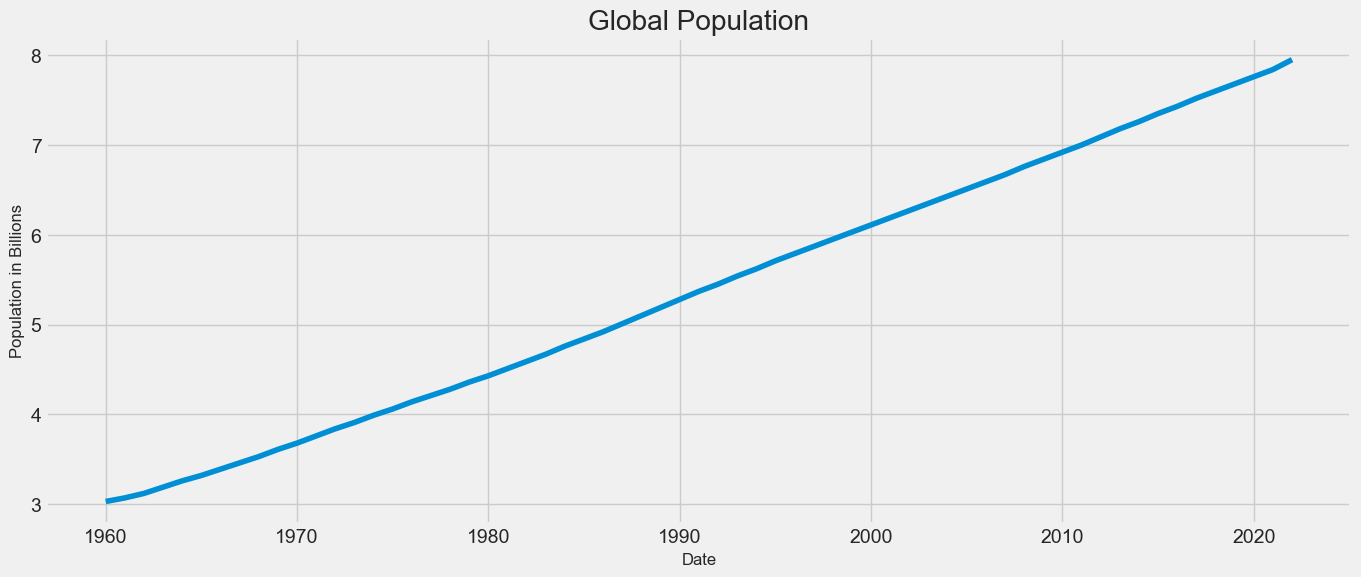

In [77]:
plt.figure(figsize = (15, 6))
plt.plot(pop['Year'], pop[' Population'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('Population in Billions', {'fontsize': 12})
plt.title('Global Population')
plt.show()